# Yulu Business Case Study

# 1. Define Problem Statement and Perform Exploratory Data Analysis

## 1.1 Definition of Problem Statement:

Yulu, India's leading micro-mobility service provider, which provides e-bike rental services for the first and last mile commute has recently suffered a considerable dip in their revenues.

They specifically want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

They want to know,

    1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    2. How well those variables describe the electric cycle demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, geom
import datetime as dt
from scipy.stats import ttest_ind, chisquare, chi2, chi2_contingency, f_oneway
from scipy.stats import kruskal, shapiro, levene, pearsonr, spearmanr, poisson, expon, ttest_rel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv("/Users/vidish/Desktop/dev/python/jupyter_notebooks/business_cases/case4_yulu/yulu_data.csv")
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1. 2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

### Statistical Summary

In [3]:
print("The following is the Statistical Summary of the entire data set: ")
df.describe(include = "all")

The following is the Statistical Summary of the entire data set: 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


### Shape of the Data

In [4]:
print("The shape of the data is as follows")
print("The Number of Rows = ",df.shape[0])
print("The Number of Columns = ",df.shape[1])

The shape of the data is as follows
The Number of Rows =  10886
The Number of Columns =  12


### Data Types of all the Attributes

In [5]:
print("The following are the details of data types of all the attributes")
df.info()

The following are the details of data types of all the attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Missing Value Detection

In [6]:
missing_values = df.isna().sum()
print(f"Missing Values : \n\n{missing_values}")

Missing Values : 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


### Outliers

In [7]:
outliers = {}
for column in df.columns:
    if df[column].dtype != object:
        mean = df[column].mean()
        std = df[column].std()
        column_outliers = df[(np.abs(df[column] - mean) > 3 * std)]
        outliers[column] = column_outliers
print("Outliers:")
for column, column_outliers in outliers.items():
    print(f"{column} Outliers:\n{column_outliers}\n")

Outliers:
season Outliers:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

holiday Outliers:
                  datetime  season  holiday  workingday  weather   temp   
372    2011-01-17 00:00:00       1        1           0        2   8.20  \
373    2011-01-17 01:00:00       1        1           0        2   8.20   
374    2011-01-17 02:00:00       1        1           0        2   7.38   
375    2011-01-17 03:00:00       1        1           0        2   7.38   
376    2011-01-17 04:00:00       1        1           0        2   7.38   
...                    ...     ...      ...         ...      ...    ...   
10257  2012-11-12 19:00:00       4        1           0        1  22.14   
10258  2012-11-12 20:00:00       4        1           0        2  21.32   
10259  2012-11-12 21:00:00       4        1           0        3  22.14   
10260  2012-11-12 22:00:00       4        1           0    

## 1.3 Univariate Analysis (Distplot, Countplot Histograms and Boxplots)

/var/folders/7t/wnyn31qs37gg4xdxsbzlpmrh0000gn/T/ipykernel_981/748223881.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=False)


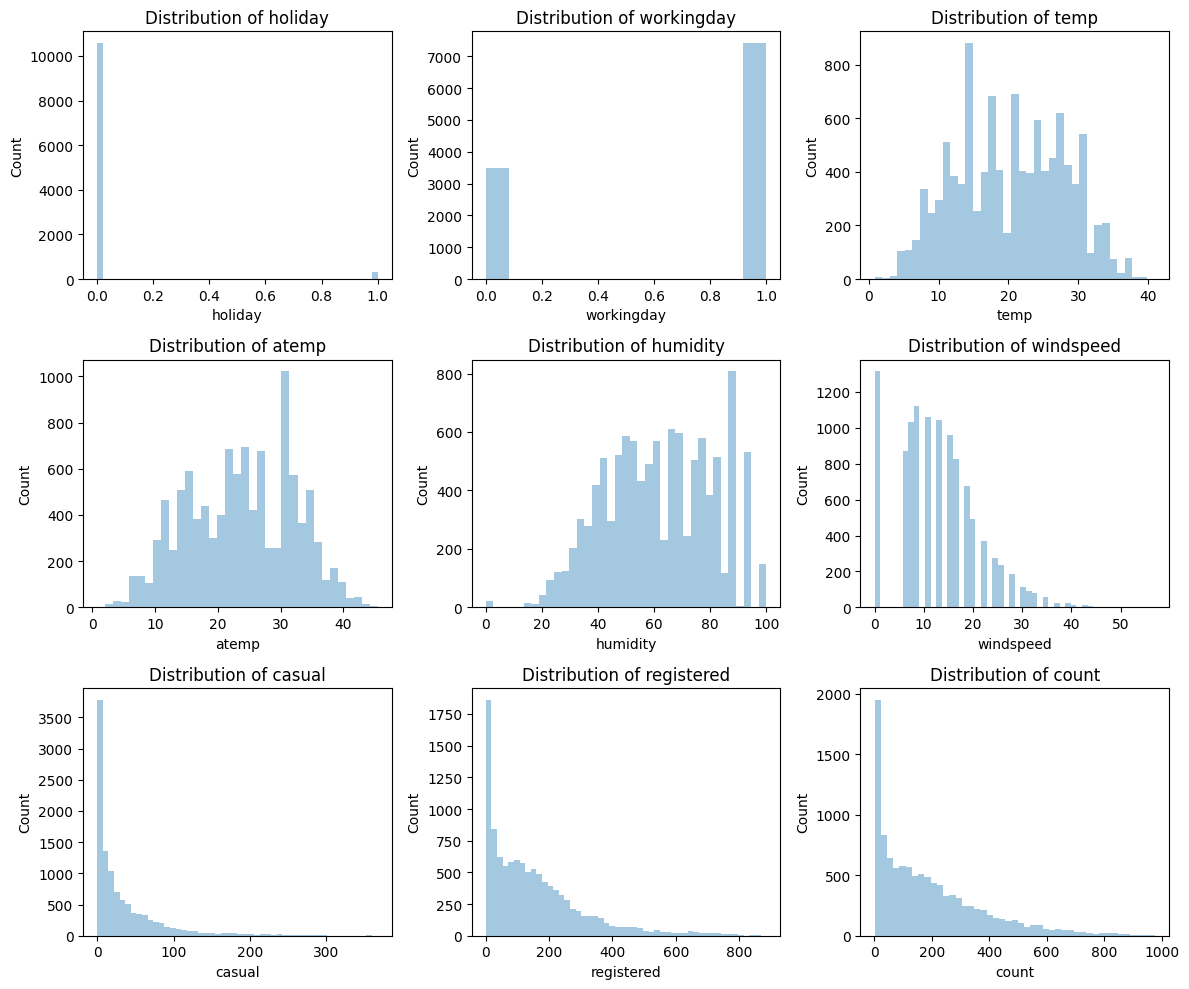

In [8]:
# distplot for numerical data
numerical_columns = ["holiday", "workingday", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.distplot(df[column], kde=False)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

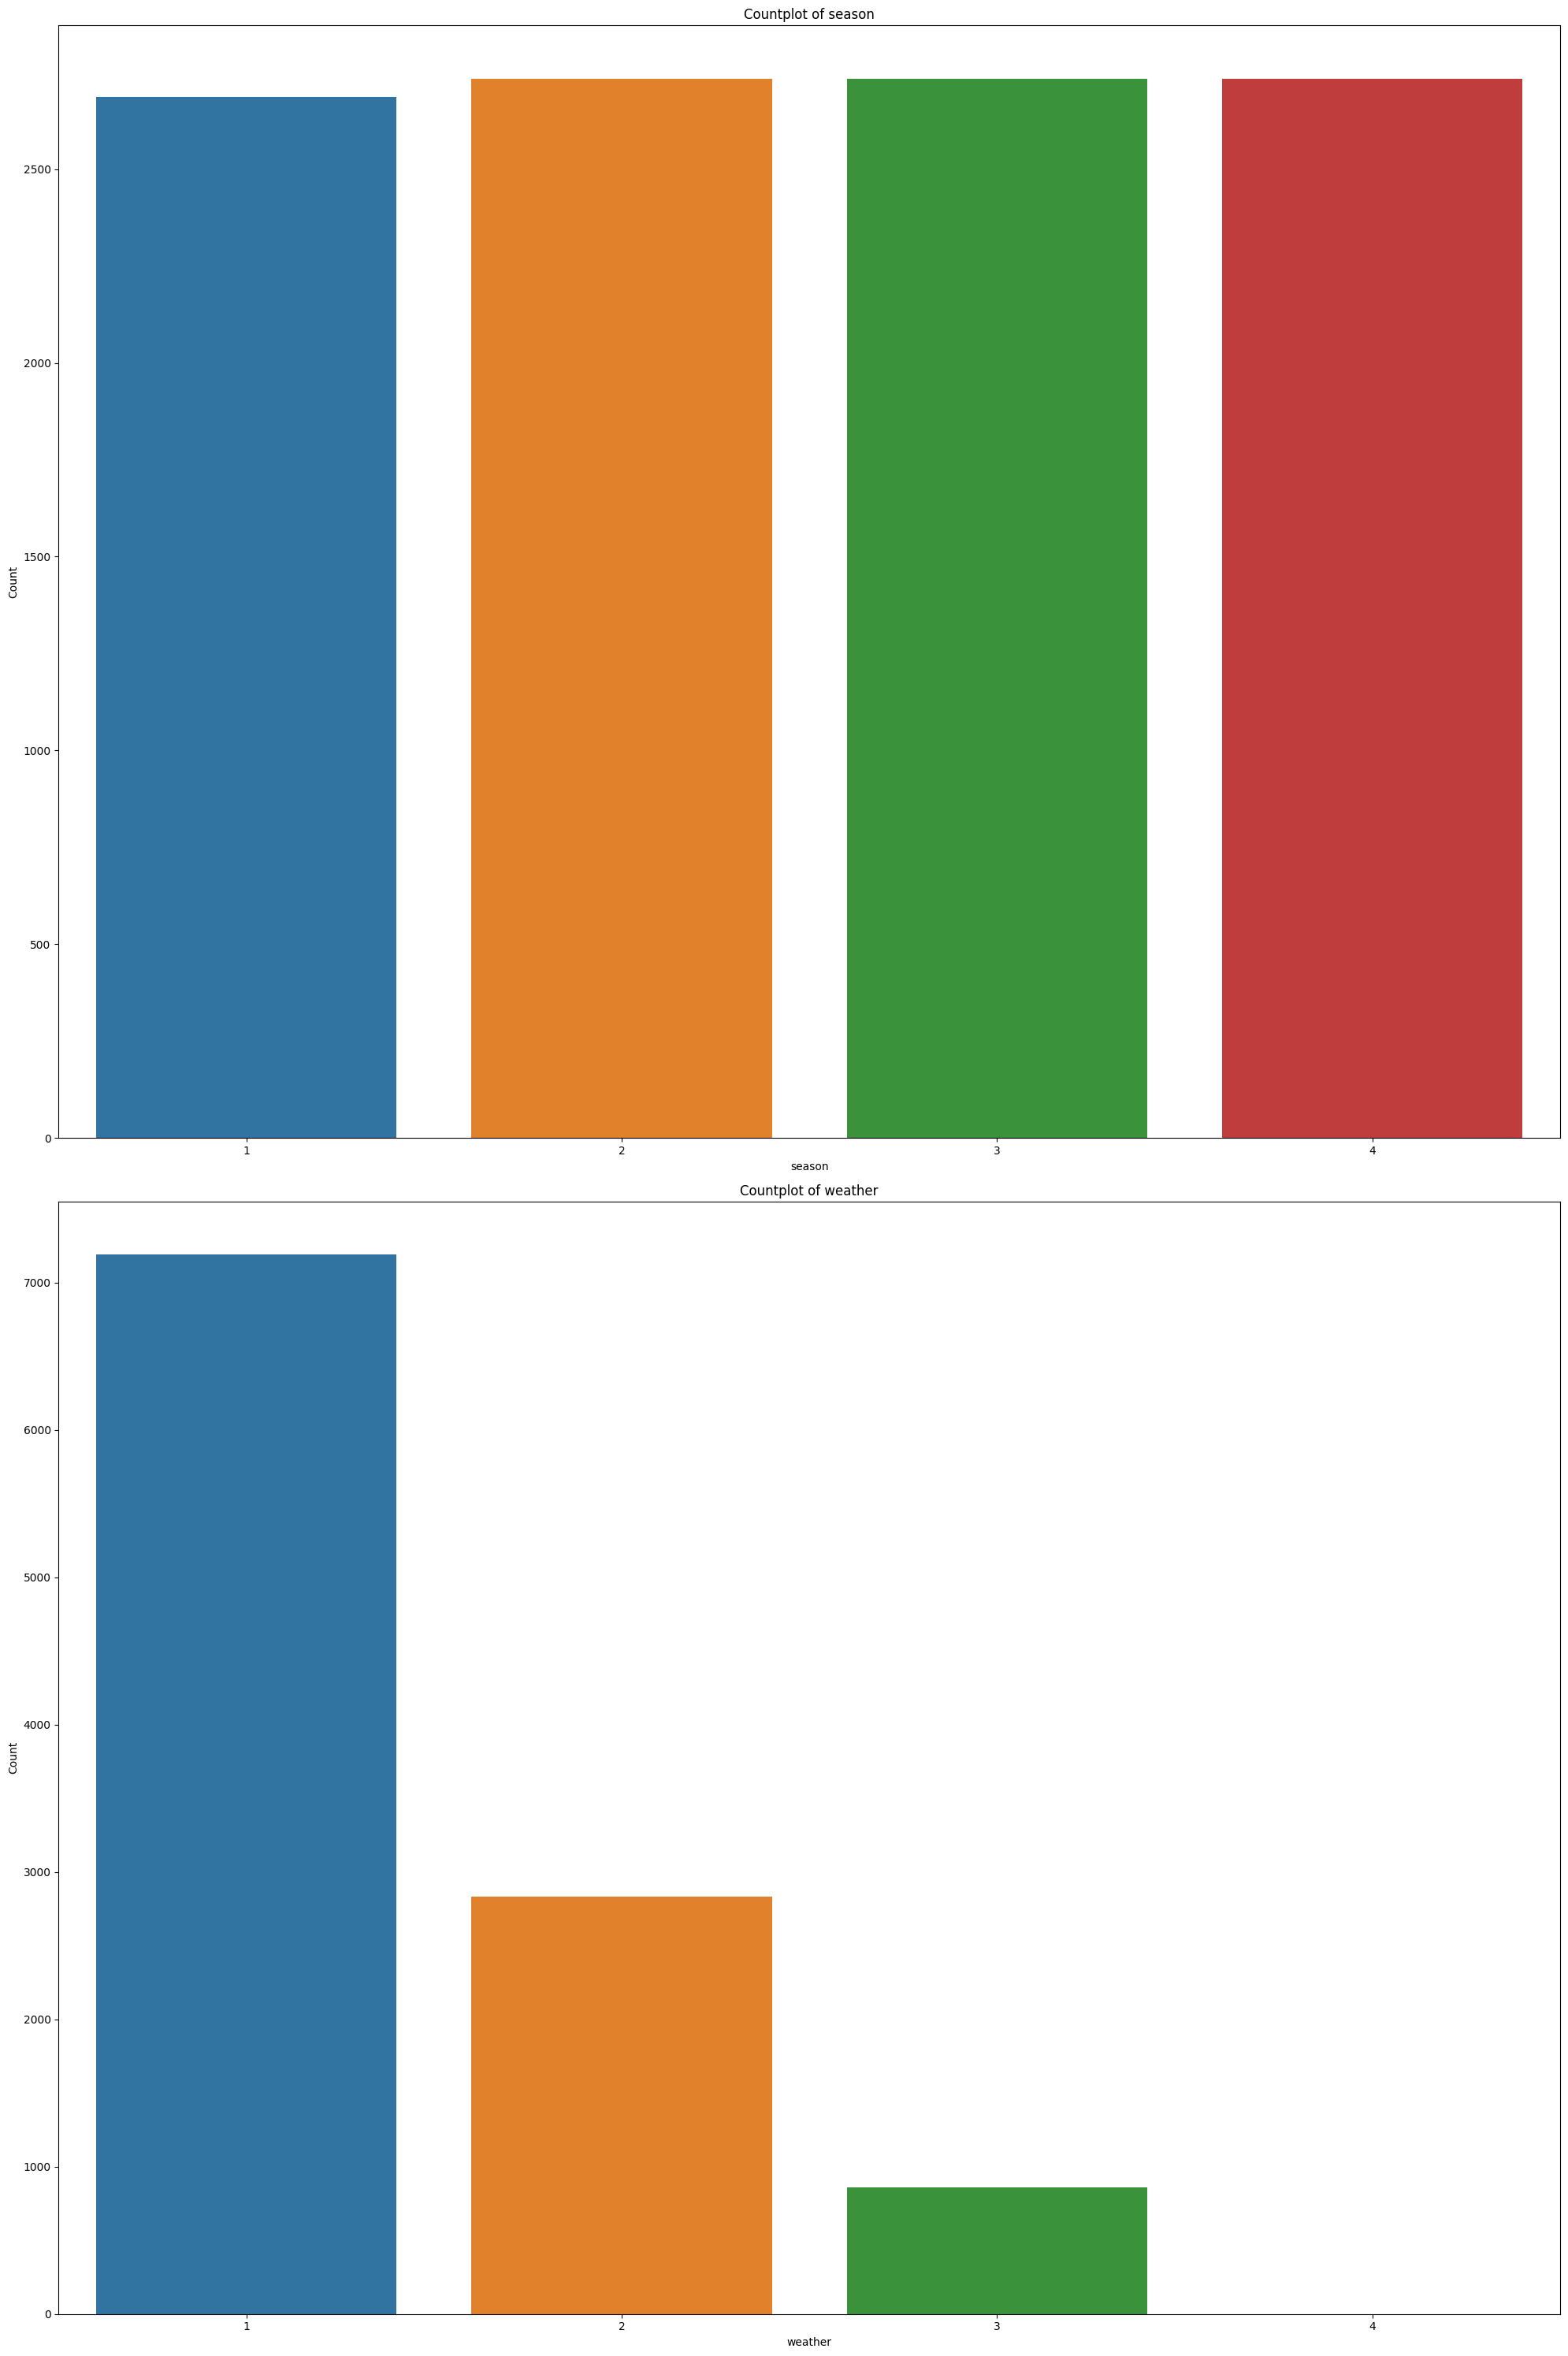

In [9]:
# countplot for all the categorical data
categorical_columns = ["season", "weather"]
plt.figure(figsize = (20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 1, i)
    sns.countplot(data = df, x = column)
    plt.title(f"Countplot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

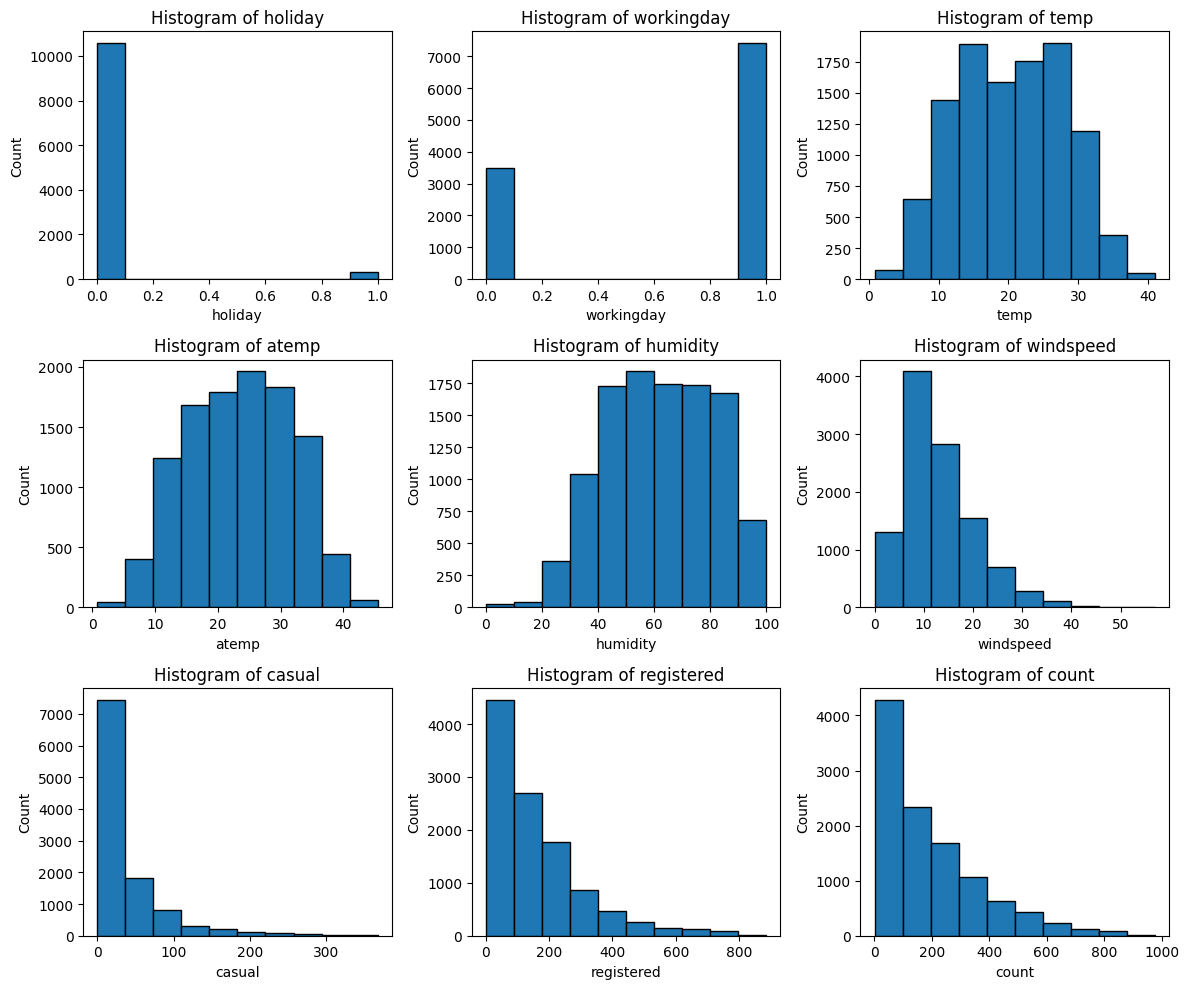

In [10]:
# histograms for all numerical data
numerical_columns = ["holiday", "workingday", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column], bins=10, edgecolor="black")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

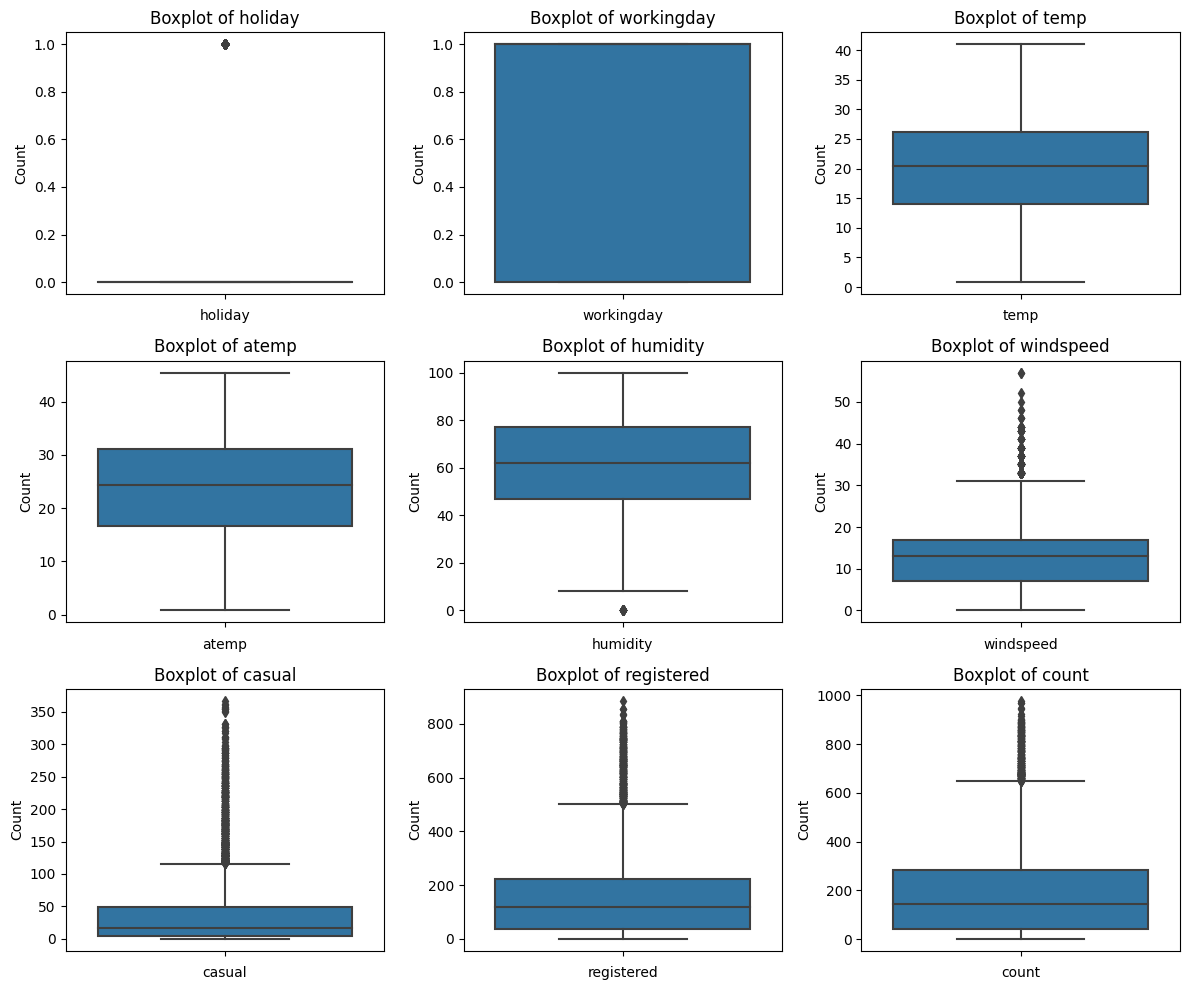

In [11]:
# boxplots for all numerical data
numerical_columns = ["holiday", "workingday", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 1.4 Bivariate Analysis (Heatmap and Pairplot)

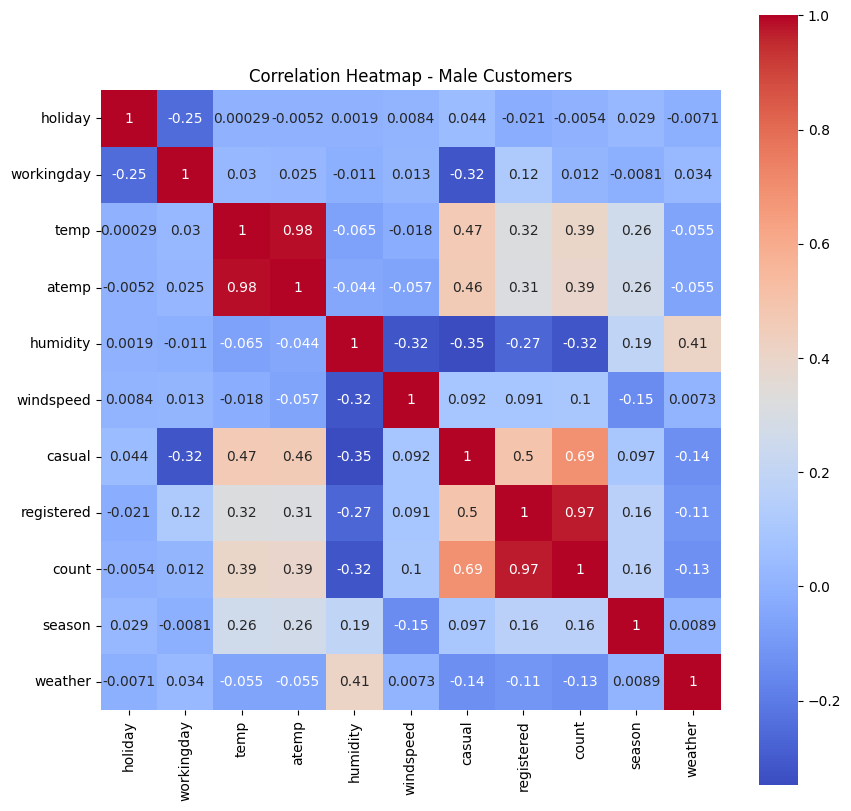

In [12]:
# heatmap for numerical data
df['season'] = df['season'].astype(int)
df['weather'] = df['weather'].astype(int)
numerical_columns = ["holiday", "workingday", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count", "season", "weather"]
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Male Customers")
plt.show()
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')

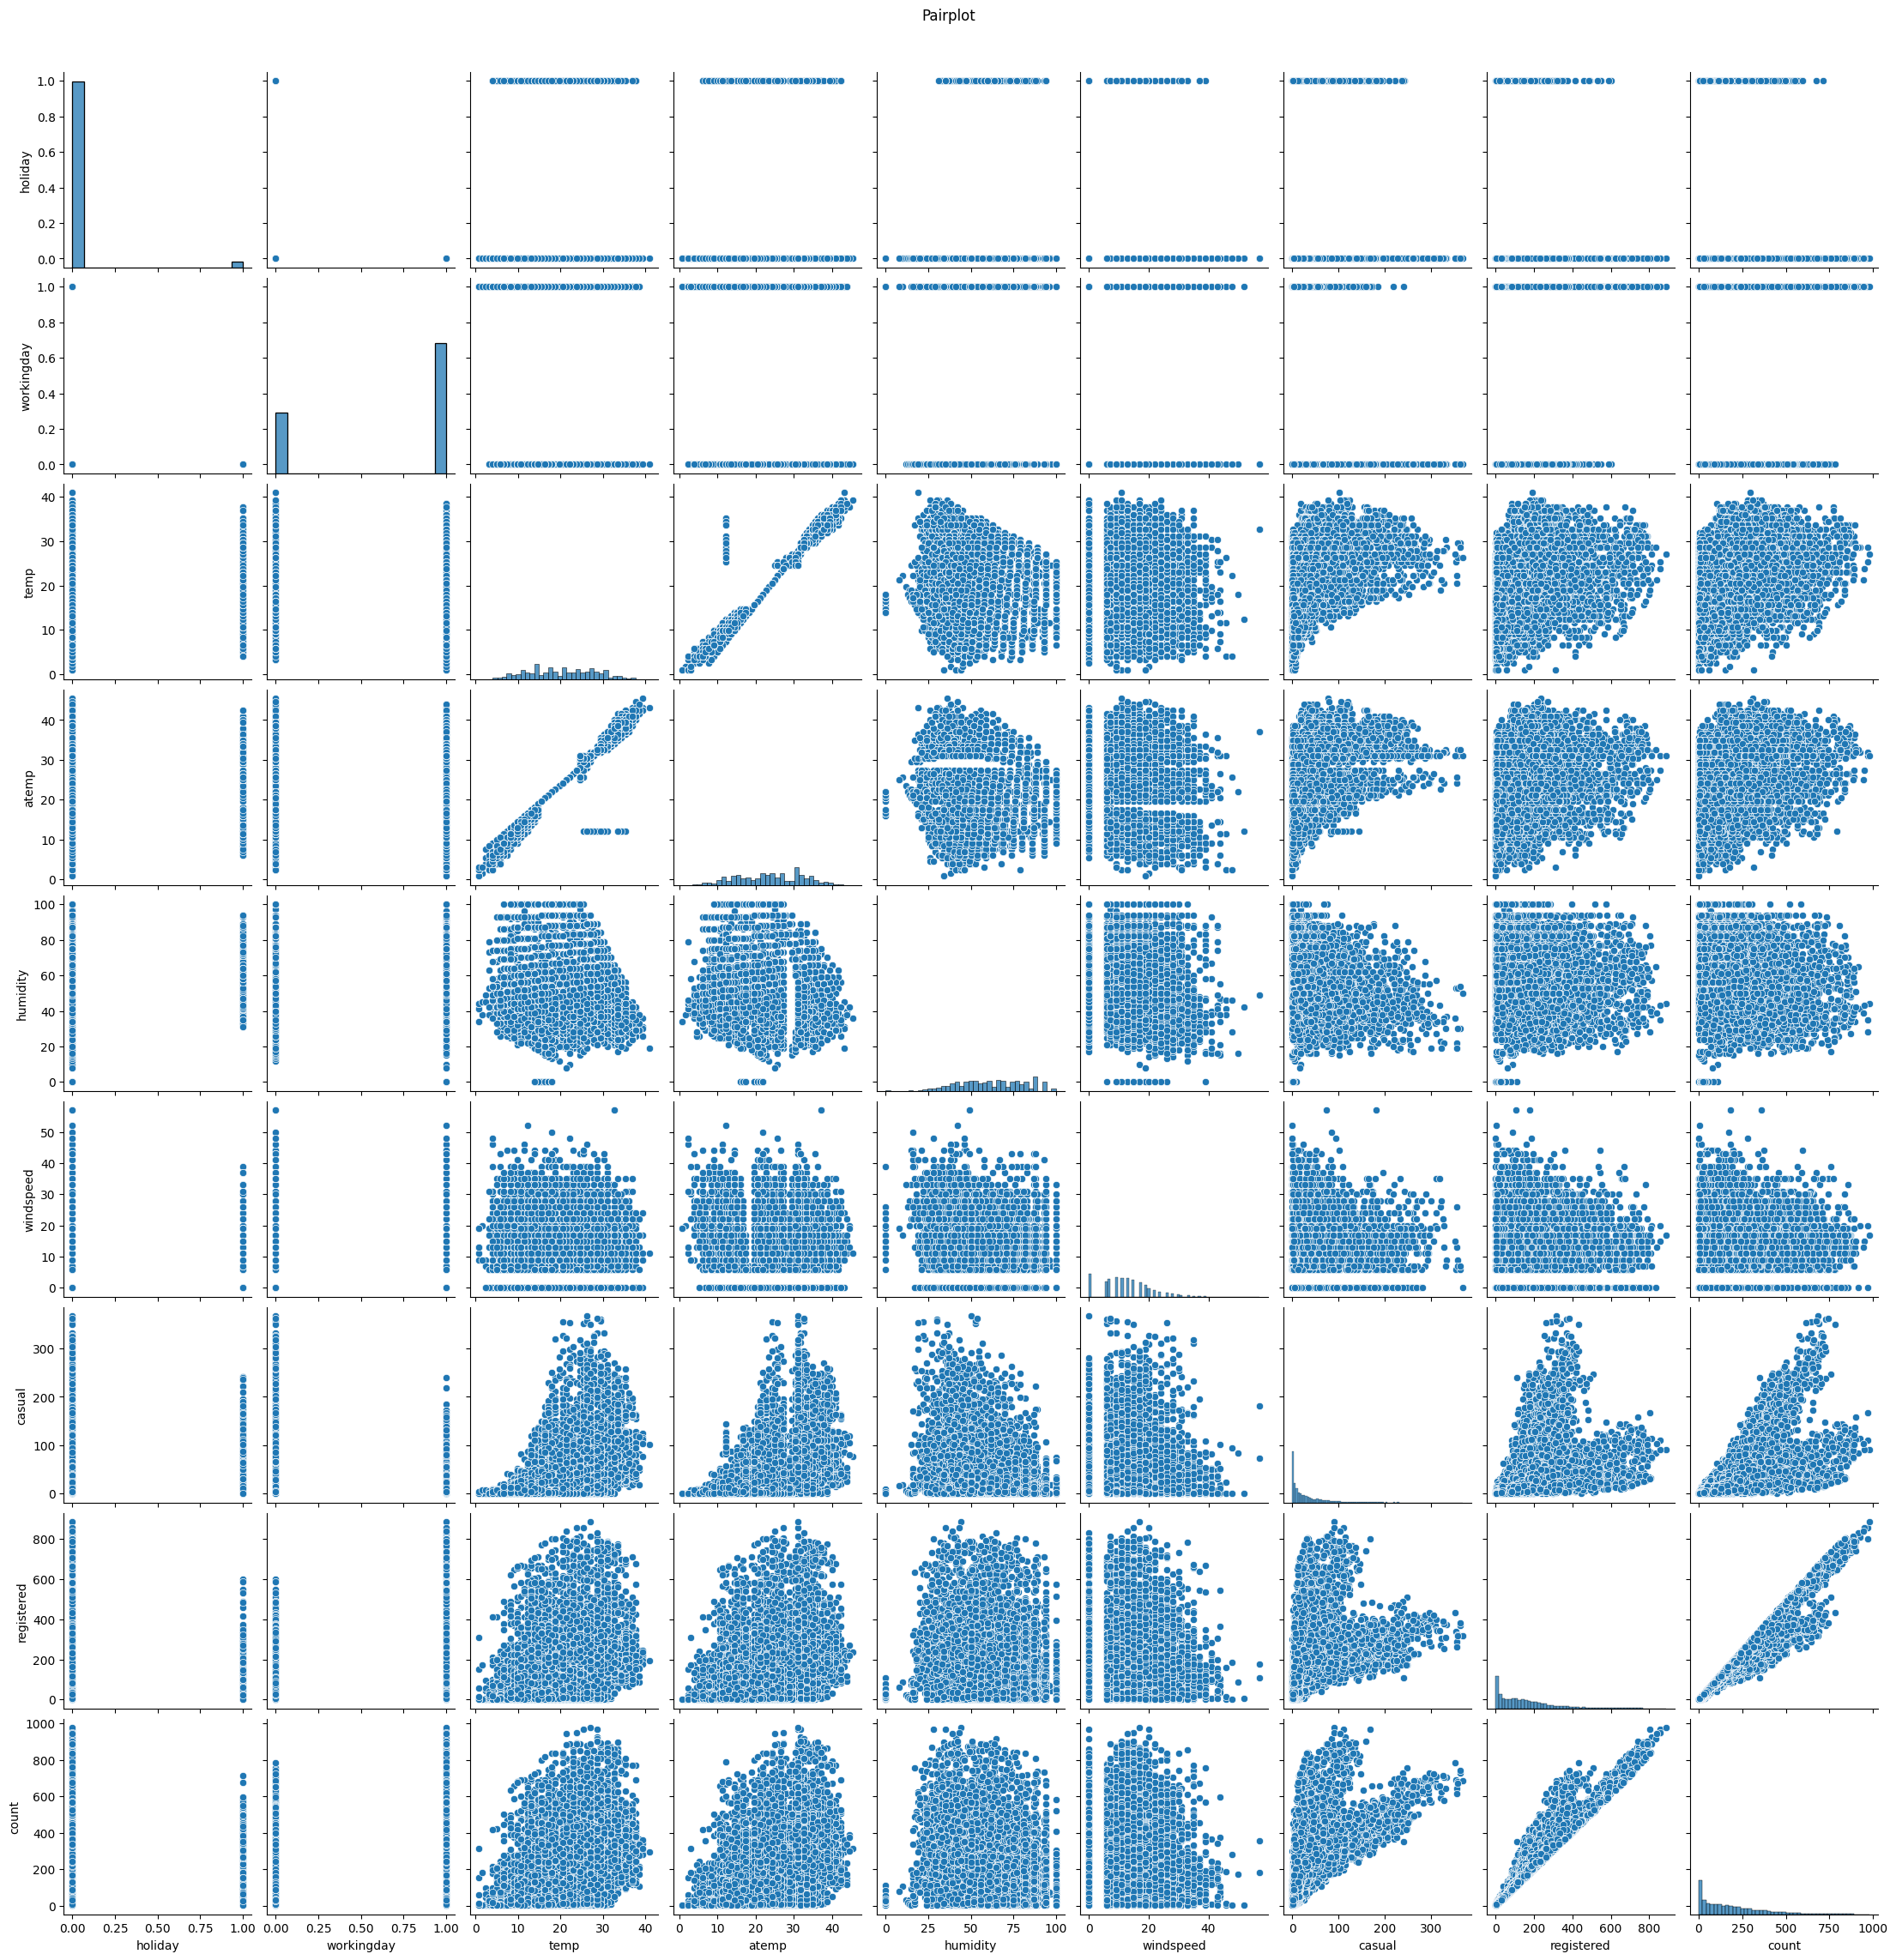

In [13]:
# pairplot for numerical data
numerical_columns = ["holiday", "workingday", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairplot", y = 1.02)
plt.show()

## 1.5 Insights Based on EDA

### Comments on the Range of Attributes, Outliers of Various Attributes:

In [14]:
print("Value Counts of Seasons: ", df["season"].value_counts())
print("Unique Attributes of Season: ", df["season"].unique())

Value Counts of Seasons:  season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
Unique Attributes of Season:  [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


In [15]:
print("Value Counts of Weather: ", df["weather"].value_counts())
print("Unique Attributes of Weather: ", df["weather"].unique())

Value Counts of Weather:  weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
Unique Attributes of Weather:  [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


In [16]:
print("Value Counts of Temperature: ", df["temp"].value_counts())
print("Unique Attributes of Temperature: ", df["temp"].unique())

Value Counts of Temperature:  temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: count, dtype: int64
Unique Attributes of Temperature:  [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 

In [17]:
print("Value Counts of Feeling Temperature: ", df["atemp"].value_counts())
print("Unique Attributes of Feeling Temperature: ", df["atemp"].unique())

Value Counts of Feeling Temperature:  atemp
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: count, dtype: int64
Unique Attributes of Feeling Temperature:  [14.395 13.635 12.88  17.425 19.695 16.665 21.2

In [18]:
print("Value Counts of Humidity: ", df["humidity"].value_counts())
print("Unique Attributes of Humidity: ", df["humidity"].unique())

Value Counts of Humidity:  humidity
88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: count, Length: 89, dtype: int64
Unique Attributes of Humidity:  [ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  51  56  52
  49  48  37  33  28  38  36  93  29  53  34  54  41  45  92  62  58  61
  60  65  70  27  25  26  31  73  21  24  23  22  19  15  67  10   8  12
  14  13  17  16  18  20  85   0  83  84  78  79  89  97  90  96  91]


In [19]:
print("Value Counts of Wind Speed: ", df["windspeed"].value_counts())
print("Unique Attributes of Wind Speed: ", df["windspeed"].unique())

Value Counts of Wind Speed:  windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64
Unique Attributes of Wind Speed:  [ 0.      6.0032 16.9979 19.0012 19.9995 12.998  15.0013  8.9981 11.0014
 22.0028 30.0026 23.9994 27.9993 26.0027  7.0015 32.9975 36.9974 31.0009
 35.0008 39.0007 43.9989 40.9973 51.9987 46.0022 50.0021 43.0006 56.9969
 47.9988]


In [20]:
print("Value Counts of Casual Users: ", df["casual"].value_counts())
print("Unique Attributes of Casual Users: ", df["casual"].unique())
print("Total Numbers of Casual Users: ", df["casual"].sum())
print("Average Numbers of Casual Users: ", df["casual"].mean())

Value Counts of Casual Users:  casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64
Unique Attributes of Casual Users:  [  3   8   5   0   2   1  12  26  29  47  35  40  41  15   9   6  11   4
   7  16  20  19  10  13  14  18  17  21  33  23  22  28  48  52  42  24
  30  27  32  58  62  51  25  31  59  45  73  55  68  34  38 102  84  39
  36  43  46  60  80  83  74  37  70  81 100  99  54  88  97 144 149 124
  98  50  72  57  71  67  95  90 126 174 168 170 175 138  92  56 111  89
  69 139 166 219 240 147 148  78  53  63  79 114  94  85 128  93 121 156
 135 103  44  49  64  91 119 167 181 179 161 143  75  66 109 123 113  65
  86  82 132 129 196 142 122 106  61 107 120 195 183 206 158 137  76 115
 150 188 193 180 127 154 108  96 110 112 169 131 176 134 162 153 210 118
 141 146 159 178 177 136 215 198 248 225 194 237 242 235 224 236 222  77
  87 101 145 182 171 160 133 105 104

In [21]:
print("Value Counts of Registered Users: ", df["registered"].value_counts())
print("Unique Attributes of Registered Users: ", df["registered"].unique())
print("Total Number of Registered Users: ", df["registered"].sum())
print("Average Number of Registered Users: ", df["registered"].mean())

Value Counts of Registered Users:  registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64
Unique Attributes of Registered Users:  [ 13  32  27  10   1   0   2   7   6  24  30  55  47  71  70  52  26  31
  25  17  16   8   4  19  46  54  73  64  67  58  43  29  20   9   5   3
  63 153  81  33  41  48  53  66 146 148 102  49  11  36  92 177  98  37
  50  79  68 202 179 110  34  87 192 109  74  65  85 186 166 127  82  40
  18  95 216 116  42  57  78  59 163 158  51  76 190 125 178  39  14  15
  56  60  90  83  69  28  35  22  12  77  44  38  75 184 174 154  97 214
  45  72 130  94 139 135 197 137 141 156 117 155 134  89  80 108  61 124
 132 196 107 114 172 165 105 119 183 175  88  62  86 170 145 217  91 195
 152  21 126 115 223 207 123 236 128 151 100 198 157 168  84  99 173 121
 159  93  23 212 111 193 103 113 122 106  96 249 218 194 213 191 142 224
 244 143 267 256 211 161

In [22]:
print("Value Counts of Total Users (Casual + Rental): ", df["count"].value_counts())
print("Unique Attributes of Total Users (Casual + Rental): ", df["count"].unique())
print("Total Number of Users (Casual + Registered): ", df["count"].sum())
print("Average Number of Users (Casual + Registered): ", df["count"].mean())

Value Counts of Total Users (Casual + Rental):  count
5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64
Unique Attributes of Total Users (Casual + Rental):  [ 16  40  32  13   1   2   3   8  14  36  56  84  94 106 110  93  67  35
  37  34  28  39  17   9   6  20  53  70  75  59  74  76  65  30  22  31
   5  64 154  88  44  51  61  77  72 157  52  12   4 179 100  42  57  78
  97  63  83 212 182 112  54  48  11  33 195 115  46  79  71  62  89 190
 169 132  43  19  95 219 122  45  86 172 163  69  23   7 210 134  73  50
  87 187 123  15  25  98 102  55  10  49  82  92  41  38 188  47 178 155
  24  18  27  99 217 130 136  29 128  81  68 139 137 202  60 162 144 158
 117  90 159 101 118 129  26 104  91 113 105  21  80 125 133 197 109 161
 135 116 176 168 108 103 175 147  96 220 127 205 174 121 230  66 114 216
 243 152 199  58 166 170 165 160 140 211 120 145 256 126 223  85 206 124
 25

### Comments on the Range of Attributes

1. There are a total of 4 seasons in the data set.
2. The following are the seasons and the number of occurrances:
    4  |  2734
    2  |  2733
    3  |  2733
    1  |  2686
3. There are a total of 4 types of weather conditions in the data set.
4. The following are the weathers and the number of occurrences:
    1    7192
    2    2834
    3     859
    4       1
5. Total Numbers of Casual Users: 392135
6. Average Numbers of Casual Users: 36.02195480433584
7. Total Number of Registered Users: 1693341
8. Average Number of Registered Users: 155.5521771082124
9. Total Number of Users (Casual + Registered):  2085476
10. Average Number of Users (Casual + Registered):  191.57413191254824

### Comments on Outliers

The following are the outliers in the dataset:

Outliers:
season Outliers:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

holiday Outliers:
                  datetime  season  holiday  workingday  weather   temp   
372    2011-01-17 00:00:00       1        1           0        2   8.20  \
373    2011-01-17 01:00:00       1        1           0        2   8.20   
374    2011-01-17 02:00:00       1        1           0        2   7.38   
375    2011-01-17 03:00:00       1        1           0        2   7.38   
376    2011-01-17 04:00:00       1        1           0        2   7.38   
...                    ...     ...      ...         ...      ...    ...   
10257  2012-11-12 19:00:00       4        1           0        1  22.14   
10258  2012-11-12 20:00:00       4        1           0        2  21.32   
10259  2012-11-12 21:00:00       4        1           0        3  22.14   
10260  2012-11-12 22:00:00       4        1           0        1  21.32   
10261  2012-11-12 23:00:00       4        1           0        2  22.14   

        atemp  humidity  windspeed  casual  registered  count  
372     9.850        47    15.0013       1          16     17  
373     9.850        44    12.9980       1          15     16  
374     8.335        43    16.9979       0           8      8  
375     9.090        43    12.9980       0           2      2  
376     9.850        43     8.9981       1           2      3  
...       ...       ...        ...     ...         ...    ...  
10257  25.760        73    19.0012      30         323    353  
10258  25.000        77    19.0012      31         273    304  
10259  25.760        73    15.0013      10         145    155  
10260  25.000        77    16.9979      12         100    112  
10261  25.760        77    15.0013       1          62     63  

[311 rows x 12 columns]

workingday Outliers:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

weather Outliers:
                 datetime  season  holiday  workingday  weather  temp   atemp   
5631  2012-01-09 18:00:00       1        0           1        4   8.2  11.365  \

      humidity  windspeed  casual  registered  count  
5631        86     6.0032       6         158    164  

temp Outliers:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

atemp Outliers:
Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

humidity Outliers:
                 datetime  season  holiday  workingday  weather   temp   
1091  2011-03-10 00:00:00       1        0           1        3  13.94  \
1092  2011-03-10 01:00:00       1        0           1        3  13.94   
1093  2011-03-10 02:00:00       1        0           1        3  13.94   
1094  2011-03-10 05:00:00       1        0           1        3  14.76   
1095  2011-03-10 06:00:00       1        0           1        3  14.76   
1096  2011-03-10 07:00:00       1        0           1        3  15.58   
1097  2011-03-10 08:00:00       1        0           1        3  15.58   
1098  2011-03-10 09:00:00       1        0           1        3  16.40   
1099  2011-03-10 10:00:00       1        0           1        3  16.40   
1100  2011-03-10 11:00:00       1        0           1        3  16.40   
1101  2011-03-10 12:00:00       1        0           1        3  17.22   
1102  2011-03-10 13:00:00       1        0           1        3  17.22   
1103  2011-03-10 14:00:00       1        0           1        3  18.04   
1104  2011-03-10 15:00:00       1        0           1        3  18.04   
1105  2011-03-10 16:00:00       1        0           1        3  17.22   
1106  2011-03-10 17:00:00       1        0           1        2  18.04   
1107  2011-03-10 18:00:00       1        0           1        3  18.04   
1108  2011-03-10 19:00:00       1        0           1        3  18.04   
1109  2011-03-10 20:00:00       1        0           1        3  14.76   
1110  2011-03-10 21:00:00       1        0           1        3  14.76   
1111  2011-03-10 22:00:00       1        0           1        2  13.94   
1112  2011-03-10 23:00:00       1        0           1        3  13.94   

       atemp  humidity  windspeed  casual  registered  count  
1091  15.910         0    16.9979       3           0      3  
1092  15.910         0    16.9979       0           2      2  
1093  15.910         0    16.9979       0           1      1  
1094  17.425         0    12.9980       1           2      3  
1095  16.665         0    22.0028       0          12     12  
1096  19.695         0    15.0013       1          36     37  
1097  19.695         0    19.0012       1          43     44  
1098  20.455         0    15.0013       1          23     24  
1099  20.455         0    11.0014       0          17     17  
1100  20.455         0    16.9979       6           5     11  
1101  21.210         0    15.0013       4          30     34  
1102  21.210         0    15.0013       1          11     12  
1103  21.970         0    19.9995       0          12     12  
1104  21.970         0    15.0013       3          11     14  
1105  21.210         0    16.9979       1          20     21  
1106  21.970         0    26.0027       2         109    111  
1107  21.970         0    23.9994       2          80     82  
1108  21.970         0    39.0007       5          51     56  
1109  16.665         0    22.0028       9          29     38  
1110  17.425         0    15.0013       1          27     28  
1111  16.665         0     8.9981       4          30     34  
1112  17.425         0     6.0032       1          26     27  

windspeed Outliers:
                  datetime  season  holiday  workingday  weather   temp   
265    2011-01-12 12:00:00       1        0           1        1   8.20  \
613    2011-02-08 17:00:00       1        0           1        1   9.02   
750    2011-02-14 15:00:00       1        0           1        1  22.96   
752    2011-02-14 17:00:00       1        0           1        1  18.86   
753    2011-02-14 18:00:00       1        0           1        1  16.40   
...                    ...     ...      ...         ...      ...    ...   
9481   2012-09-18 10:00:00       3        0           1        3  27.88   
9482   2012-09-18 11:00:00       3        0           1        2  27.88   
9484   2012-09-18 13:00:00       3        0           1        2  28.70   
9754   2012-10-10 19:00:00       4        0           1        2  22.96   
10263  2012-11-13 01:00:00       4        0           1        3  18.04   

        atemp  humidity  windspeed  casual  registered  count  
265     7.575        47    39.0007       3          52     55  
613     9.090        32    39.0007       4         172    176  
750    26.515        21    43.9989      19          71     90  
752    22.725        33    40.9973      25         218    243  
753    20.455        40    40.9973      11         194    205  
...       ...       ...        ...     ...         ...    ...  
9481   31.820        79    43.0006      30         130    160  
9482   31.820        79    43.0006      36         115    151  
9484   33.335        74    39.0007      17          97    114  
9754   26.515        46    39.0007      32         534    566  
10263  21.970        88    43.0006       0           5      5  

[67 rows x 12 columns]

casual Outliers:
                  datetime  season  holiday  workingday  weather   temp   
1384   2011-04-03 13:00:00       2        0           0        1  18.04  \
1385   2011-04-03 14:00:00       2        0           0        1  18.86   
1935   2011-05-07 13:00:00       2        0           0        1  24.60   
2127   2011-05-15 13:00:00       2        0           0        1  25.42   
2129   2011-05-15 15:00:00       2        0           0        1  27.06   
...                    ...     ...      ...         ...      ...    ...   
10226  2012-11-11 12:00:00       4        0           0        1  20.50   
10227  2012-11-11 13:00:00       4        0           0        1  22.14   
10228  2012-11-11 14:00:00       4        0           0        1  24.60   
10229  2012-11-11 15:00:00       4        0           0        1  22.96   
10230  2012-11-11 16:00:00       4        0           0        1  22.14   

        atemp  humidity  windspeed  casual  registered  count  
1384   21.970        33    19.9995     219         148    367  
1385   22.725        31     8.9981     240         109    349  
1935   31.060        35    19.0012     196         240    436  
2127   29.545        73    19.0012     195         261    456  
2129   31.060        69    16.9979     206         253    459  
...       ...       ...        ...     ...         ...    ...  
10226  24.240        48     6.0032     195         390    585  
10227  25.760        45     7.0015     262         424    686  
10228  31.060        33    11.0014     292         362    654  
10229  26.515        37    15.0013     304         420    724  
10230  25.760        42    15.0013     260         393    653  

[292 rows x 12 columns]

registered Outliers:
                  datetime  season  holiday  workingday  weather   temp   
6611   2012-03-12 18:00:00       1        0           1        2  24.60  \
6634   2012-03-13 17:00:00       1        0           1        1  28.70   
6635   2012-03-13 18:00:00       1        0           1        1  28.70   
6649   2012-03-14 08:00:00       1        0           1        1  18.04   
6658   2012-03-14 17:00:00       1        0           1        1  28.70   
...                    ...     ...      ...         ...      ...    ...   
10702  2012-12-12 08:00:00       4        0           1        2  10.66   
10726  2012-12-13 08:00:00       4        0           1        1   9.84   
10750  2012-12-14 08:00:00       4        0           1        1   8.20   
10846  2012-12-18 08:00:00       4        0           1        1  15.58   
10870  2012-12-19 08:00:00       4        0           1        1   9.84   

        atemp  humidity  windspeed  casual  registered  count  
6611   31.060        43    12.9980      89         623    712  
6634   31.820        37     7.0015      62         614    676  
6635   31.820        34    19.9995      96         638    734  
6649   21.970        82     0.0000      34         628    662  
6658   31.820        28     6.0032     140         642    782  
...       ...       ...        ...     ...         ...    ...  
10702  12.880        65    11.0014      18         670    688  
10726  11.365        60    12.9980      24         655    679  
10750  11.365        69     6.0032      13         623    636  
10846  19.695        94     0.0000      10         652    662  
10870  12.880        87     7.0015      13         665    678  

[235 rows x 12 columns]

count Outliers:
                  datetime  season  holiday  workingday  weather   temp   
6658   2012-03-14 17:00:00       1        0           1        1  28.70  \
6659   2012-03-14 18:00:00       1        0           1        1  28.70   
6683   2012-03-15 18:00:00       1        0           1        1  27.06   
6779   2012-03-19 18:00:00       1        0           1        1  26.24   
6849   2012-04-03 17:00:00       2        0           1        1  25.42   
...                    ...     ...      ...         ...      ...    ...   
9935   2012-10-18 08:00:00       4        0           1        1  18.86   
9944   2012-10-18 17:00:00       4        0           1        2  23.78   
9945   2012-10-18 18:00:00       4        0           1        2  22.96   
10519  2012-12-04 17:00:00       4        0           1        1  21.32   
10534  2012-12-05 08:00:00       4        0           1        2  18.04   

        atemp  humidity  windspeed  casual  registered  count  
6658   31.820        28     6.0032     140         642    782  
6659   31.820        32     0.0000     102         647    749  
6683   31.060        44    19.0012      98         648    746  
6779   31.060        57    16.9979     120         681    801  
6849   30.305        17    12.9980     123         634    757  
...       ...       ...        ...     ...         ...    ...  
9935   22.725        82    16.9979      31         803    834  
9944   27.275        64    22.0028     102         788    890  
9945   26.515        64    22.0028      68         720    788  
10519  25.000        59    15.0013      43         700    743  
10534  21.970        58    19.0012      22         737    759  

[147 rows x 12 columns]

### Comments on the distribution of the variables and relationship between them:

According to the Heatmap Generated above (goto Line 12), the following insights can be drawn:
1. Temperature and Casual Users are Positively Highly Correlated
2. Temperature and Registered Users are Positively Correlated
3. Temperature and  Users are Positively Correlated
4. Seasons and Casual Users are Positively Correlated, but the correlation is not that significant.
5. Seasons and Registered Users are Positively Correlated.
6. Seasons and Total Users are Positively Correlated.
7. Weather and Casual Users are Negatively Highly Correlated.
8. Weather and Registered Users are Negatively Highly Correlated.
9. Weather and Total Users are Negatively Highly Correlated.

### Comments on Each Univariate and Bivariate Plot:

1. From the Distplot:
	- There are over 7000 working days in the data set.
	- The maximum number of users preferred to use the Yulu scooters when the temperatures are between 10 and 30 degrees celsius.
	- The maximum number of users preferred to use the Yulu scooters when the Humidity is mostly ranging between 40 and 80.
	- The maximum number of users preferred to use the Yulu scooters when the windspeed is less than 30.
	- The graphs for Casual, Registered and Total Users are all right skewed.

2. From the Countplot:
	- The number of users are equally distributed in all the seasons.
	- The maximum number of users used the Yulu scooters when the weather is clear, few clouds, and partly cloudy.
	- There were considerably less number of users when the weather conditions were Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

3. From the Histograms:
	- There are over 7000 working days in the data set.
	- The maximum number of users preferred to use the Yulu scooters when the temperatures are between 10 and 30 degrees celsius.
	- The maximum number of users preferred to use the Yulu scooters when the Humidity is mostly ranging between 40 and 80.
	- The maximum number of users preferred to use the Yulu scooters when the windspeed is less than 30.
	- The graphs for Casual, Registered and Total Users are all right skewed.

# 2 Hypothesis Testing

In [23]:
# setting the significance level to 5%
alpha = 0.05 

## 2.1 Two-Sample T-Test

To check if Working Day has an effect on the number of electric cycles rented

Ho: Working Day has no effect on the number of electric cycles rented.

Ha: Working Day has an effect on the number of electric cycles rented.

In [24]:
# performing the 2-sample t-test
working_day_data = df[df["workingday"] == 1]["count"]
non_working_day_data = df[df["workingday"] == 0]["count"]

t_statistic, p_value = ttest_ind(working_day_data, non_working_day_data)
print(f"T-Statistic = {t_statistic}")
print(f"P-Value = {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis (Ha: Working Day has an effect on the number of electric cycles rented)")
else:
    print("Fail to reject the null hypothesis (Ho: Working Day has no effect on the number of electric cycles rented)")

T-Statistic = 1.2096277376026694
P-Value = 0.22644804226361348
Fail to reject the null hypothesis (Ho: Working Day has no effect on the number of electric cycles rented)


## 2.2 ANOVA

To check if No. of cycles rented is similar or different in different 
1. Weather 
2. Season

1. Weather:

Ho: The number of cycles rented is similar among different weather conditions

Ha: The number of cycles rented is different among different weather conditions

2. Season:

Ho: The number of cycles rented is similar among different seasons

Ha: The number of cycles rented is different among different seasons

In [25]:
# performing ANOVA test for weather conditions
weather_groups = df.groupby("weather")["count"].apply(list)
f_statistic_weather, p_value_weather = f_oneway(*weather_groups)

# performing ANOVA test for seasons
season_groups = df.groupby("season")["count"].apply(list)
f_statistic_season, p_value_season = f_oneway(*season_groups)

print("ANOVA test results for Weather Conditions:")
print("F-statistic:", f_statistic_weather)
print("p-value:", p_value_weather)

if p_value_weather < alpha:
    print("Reject the null hypothesis, accept alternate hypothesis: The number of cycles rented is different among different weather conditions.")
else:
    print("Fail to reject the null hypothesis: The number of cycles rented is similar among different weather conditions.")

print("\nANOVA test results for Seasons:")
print("F-statistic:", f_statistic_season)
print("p-value:", p_value_season)

if p_value_season < alpha:
    print("Reject the null hypothesis, accept alternate hypothesis: The number of cycles rented is different among different seasons.")
else:
    print("Fail to reject the null hypothesis: The number of cycles rented is similar among different seasons.")


ANOVA test results for Weather Conditions:
F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42
Reject the null hypothesis, accept alternate hypothesis: The number of cycles rented is different among different weather conditions.

ANOVA test results for Seasons:
F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149
Reject the null hypothesis, accept alternate hypothesis: The number of cycles rented is different among different seasons.


## 2.3 Chi-Square Test

To check if Weather is dependent on the season.

Ho: Weather is not dependent on the Season.

Ha: Weather is dependent on the Season.

In [26]:
# creating a contingency table of weather and season
contingency_table = pd.crosstab(df["weather"], df["season"])

# performing the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test results:")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

if p_value < alpha:
    print("Reject the null hypothesis, accept alternate hypothesis: Weather is dependent on the season.")
else:
    print("Fail to reject the null hypothesis: Weather is not dependent on the season.")

Chi-square test results:
Chi-square statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
Degrees of freedom: 9
Expected frequencies:
season             1            2            3            4
weather                                                    
1        1774.546390  1805.597648  1805.597648  1806.258313
2         699.258130   711.493845   711.493845   711.754180
3         211.948742   215.657450   215.657450   215.736359
4           0.246739     0.251056     0.251056     0.251148
Reject the null hypothesis, accept alternate hypothesis: Weather is dependent on the season.
